In [4]:
import pandas as pd
from lifelines.datasets import load_waltons
# install by pip install lifelines

# Load the Walton's survival dataset
df = load_waltons()

# Print the dataset
print(df.head())

# Print the number of rows and columns
print(df.shape)

# The columns means:
# T = time of death or time of censoring
# E = 1 if death event occured, 0 if censored
# group = group of the individual


      T  E    group
0   6.0  1  miR-137
1  13.0  1  miR-137
2  13.0  1  miR-137
3  13.0  1  miR-137
4  19.0  1  miR-137
(163, 3)


In [7]:
# Import the KaplanMeierFitter class
from lifelines import KaplanMeierFitter

# Create a KaplanMeierFitter instance
kmf = KaplanMeierFitter()

# Fit the data into the model
T = df['T']
E = df['E']
kmf.fit(T, event_observed=E)

# Print the event table
kmf.event_table.head()

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,163,163
6.0,1,1,0,0,163
7.0,2,1,1,0,162
9.0,3,3,0,0,160
13.0,3,3,0,0,157


In [8]:
# Print the survival probability
kmf.survival_function_.head()

,KM_estimate
timeline,
0.0,1.000000
6.0,0.993865
7.0,0.987730
9.0,0.969210
13.0,0.950690


In [9]:
# Print the cumulative density function
kmf.cumulative_density_.head()

,KM_estimate
timeline,
0.0,0.000000
6.0,0.006135
7.0,0.012270
9.0,0.030790
13.0,0.049310


In [10]:
# Print the median time to event
kmf.median_survival_time_

56.0

<Axes: xlabel='timeline'>

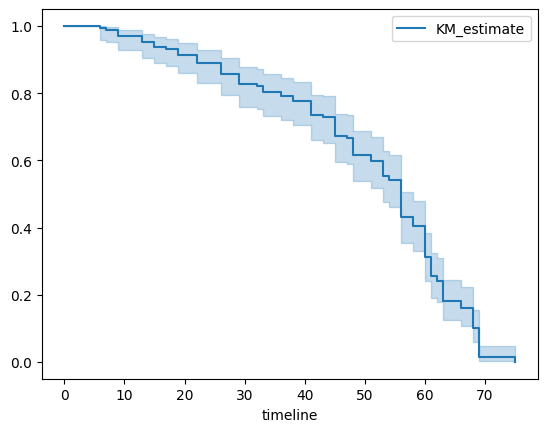

In [11]:
# plot the KM estimate
kmf.plot()